AÑADIR, MEDIAS, MODAS, VARIANZAS DE LAS VARIABLES
COMPROBAR HIPOTESIS
PARADOJA SIMPSON?


In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import squarify
from wordcloud import WordCloud
import country_converter as coco
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


## Carga de Datos

In [172]:
df2= pd.read_csv(r'C:/Users/laura/Desktop/SALARY_ANALYSIS/data/Salary_Data.csv', sep = ',')

## Primera exploración

In [173]:
df2.shape

(6704, 6)

In [174]:
df.size

40212

In [175]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [176]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.5+ KB


In [178]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [179]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        1
Job Title              0
Years of Experience    1
Salary                 3
dtype: int64

In [180]:
df.isna().sum()/len(df)*100

Age                    0.000000
Gender                 0.000000
Education Level        0.014921
Job Title              0.000000
Years of Experience    0.014921
Salary                 0.044763
dtype: float64

In [181]:
df.describe(exclude=object).round(2)

,Age,Years of Experience,Salary
count,6702.00,6701.00,6699.00
mean,33.62,8.09,115326.96
std,7.61,6.06,52786.18
min,21.00,0.00,350.00
25%,28.00,3.00,70000.00
50%,32.00,7.00,115000.00
75%,38.00,12.00,160000.00
max,62.00,34.00,250000.00


In [168]:
df.describe(exclude=float).round(2)

,Gender,Education Level,Job Title
count,6702,6701,6702
unique,3,7,193
top,Male,Bachelor's Degree,Software Engineer
freq,3674,2267,518


In [169]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

## Limpieza

In [170]:
rows_with_nan = df2[df2.isna().any(axis=1)]
rows_with_nan

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [30]:
df = df.dropna(axis=0, how='all')

In [16]:
len(df['Job Title'].unique())

194

en el punto anterior, se han buscado las filas con valores nulos para job title. habia solo dos filas, y se han eliminado  porque todos sus valores eran nulos.

**NOS QUEDAMOS SOLO CON LOS DATOS DE EMPLEOS RELACIONADOS CON DATA**

In [33]:
df_data = df[df['Job Title'].str.contains('Data', case=False)].sort_values(by='Job Title')

In [69]:
df_data['Job Title'].unique()

array(['Chief Data Officer', 'Data Analyst', 'Data Entry Clerk',
       'Data Scientist', 'Director of Data Science',
       'Junior Data Analyst', 'Junior Data Scientist',
       'Senior Data Analyst', 'Senior Data Engineer',
       'Senior Data Scientist'], dtype=object)

In [37]:
df_data.shape

(969, 6)

In [38]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 105 to 4836
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  969 non-null    float64
 1   Gender               969 non-null    object 
 2   Education Level      969 non-null    object 
 3   Job Title            969 non-null    object 
 4   Years of Experience  969 non-null    float64
 5   Salary               969 non-null    float64
dtypes: float64(3), object(3)
memory usage: 53.0+ KB


In [52]:
df_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's,Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's,Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's,Data Analyst,3.0,120000.0


In [99]:
df_data.describe(include=object).round(2)

,Gender,Education Level,Job Title
count,969,969,969
unique,2,3,8
top,Male,PhD,Senior Data Scientist
freq,604,432,485


In [98]:
df_data.describe(exclude=object).round(2)

,Age,Years of Experience,Salary
count,969.00,969.00,969.00
mean,33.65,9.00,148816.31
std,7.34,5.76,39938.55
min,23.00,0.00,35000.00
25%,28.00,5.00,120000.00
50%,31.00,8.00,150000.00
75%,41.00,13.00,180000.00
max,51.00,24.00,240000.00


In [100]:
df_data['Job Title'].value_counts()


Job Title
Senior Data Scientist       485
Junior Data Analyst         245
Senior Data Analyst         146
Director of Data Science     57
Junior Data Scientist        30
Senior Data Engineer          4
Chief Data Officer            1
Data Entry Clerk              1
Name: count, dtype: int64

**Vamos a reducir el numero de job titles filtrando por años de experiencia**
consideramos senior a partir de 5 años

In [84]:
mask = (df_data['Years of Experience'] > 5.0) & (df_data['Job Title'] == 'Data Scientist')
if mask.any():
    df_data.loc[mask, 'Job Title'] = 'Senior Data Scientist'

mask2 = (df_data['Years of Experience'] <= 5.0) & (df_data['Job Title'] == 'Data Scientist')
if mask2.any():
    df_data.loc[mask2, 'Job Title'] = 'Junior Data Scientist'

In [94]:
mask = (df_data['Years of Experience'] > 5.0) & (df_data['Job Title'] == 'Data Analyst')
if mask.any():
    df_data.loc[mask, 'Job Title'] = 'Senior Data Analyst'

mask2 = (df_data['Years of Experience'] <= 5.0) & (df_data['Job Title'] == 'Data Analyst')
if mask2.any():
    df_data.loc[mask2, 'Job Title'] = 'Junior Data Analyst'


In [64]:
df_data[df_data['Job Title'].str.contains('Clerk', case=False)]
# df_data.drop(df['Job Title'].str.contains('Clerk', case=False))

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
18,25.0,Female,Bachelor's Degree,Data Entry Clerk,0.0,35000.0


**También lo hacemos con el Education level, filtrando por titulo conseguido**
Master's == 'Master's Degree'
Bachelor's == Bachelor's Degree

In [60]:
df_data['Education Level'].unique()

array(['PhD', "Master's Degree", "Bachelor's Degree"], dtype=object)

In [57]:
df_data['Education Level'].replace(to_replace="Master's", value="Master's Degree", inplace=True)

In [59]:
df_data['Education Level'].replace(to_replace="Bachelor's", value="Bachelor's Degree", inplace=True)

In [97]:
df_data


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0
1,28.0,Female,Master's Degree,Junior Data Analyst,3.0,65000.0
1009,25.0,Female,Bachelor's Degree,Junior Data Analyst,2.0,100000.0
1007,24.0,Male,Bachelor's Degree,Junior Data Analyst,2.0,95000.0
1003,26.0,Male,Bachelor's Degree,Junior Data Analyst,3.0,120000.0
...,...,...,...,...,...,...
4766,34.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4756,36.0,Male,Master's Degree,Senior Data Scientist,9.0,125000.0
4745,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0
4725,33.0,Male,Master's Degree,Senior Data Scientist,8.0,120000.0


## HIPOTESIS 1: ##
Relacion entre puestos de trabajo, salario y sexo.
Hipotesis nula, no hay diferencia entre sexos para el salario en los puestos relacionados con DATA.


In [116]:
df3 = pd.DataFrame(df_data.groupby(['Job Title', 'Gender'])['Salary'].mean().round(2))
df3

Salary
Job Title                Gender           
Chief Data Officer       Male    220000.00
Data Entry Clerk         Female   35000.00
Director of Data Science Female  200769.23
                         Male    207741.94
Junior Data Analyst      Female  112500.00
                         Male    102566.04
Junior Data Scientist    Female  126500.00
                         Male    117083.33
Senior Data Analyst      Female  119883.72
                         Male    155524.27
Senior Data Engineer     Female  160000.00
                         Male    150000.00
Senior Data Scientist    Female  166111.11
                         Male    167006.76

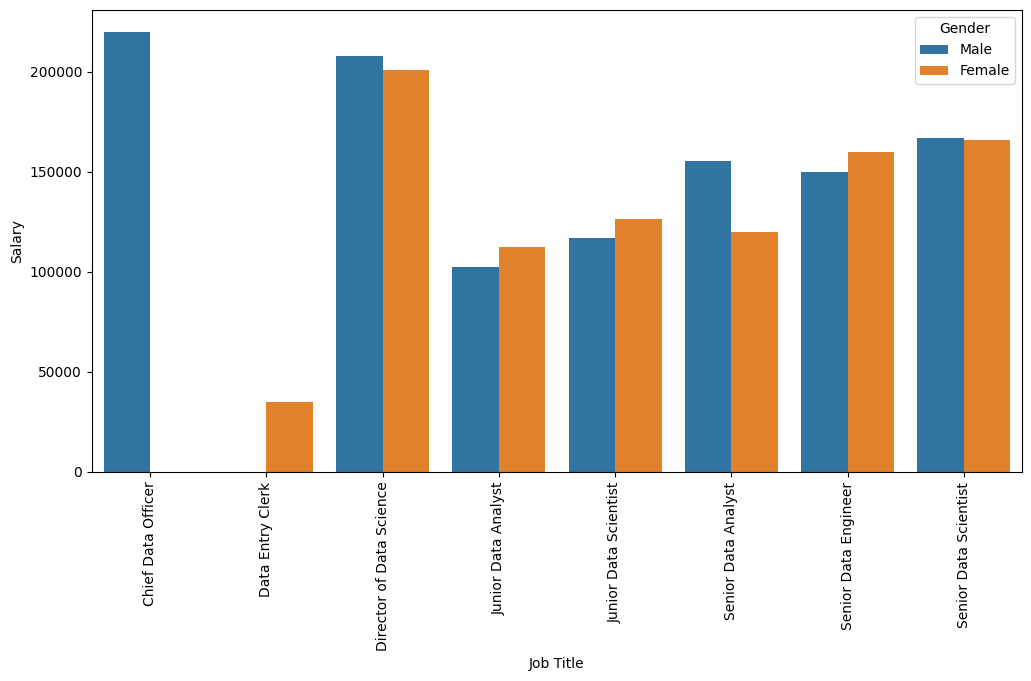

In [117]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Job Title',y= 'Salary', hue='Gender',data=df3)
plt.xticks(rotation=90)
plt.show()

In [129]:
df4 = pd.DataFrame(df_data.groupby(['Job Title','Gender'])['Gender'].count().round(2))
df4

Gender
Job Title                Gender        
Chief Data Officer       Male         1
Data Entry Clerk         Female       1
Director of Data Science Female      26
                         Male        31
Junior Data Analyst      Female      86
                         Male       159
Junior Data Scientist    Female      18
                         Male        12
Senior Data Analyst      Female      43
                         Male       103
Senior Data Engineer     Female       2
                         Male         2
Senior Data Scientist    Female     189
                         Male       296

In [132]:
df4_unstacked = df4.unstack(level='Gender')
df4_unstacked.columns = df4_unstacked.columns.droplevel()
df4_unstacked


Gender,Female,Male
Job Title,,
Chief Data Officer,NaN,1.0
Data Entry Clerk,1.0,NaN
Director of Data Science,26.0,31.0
Junior Data Analyst,86.0,159.0
Junior Data Scientist,18.0,12.0
Senior Data Analyst,43.0,103.0
Senior Data Engineer,2.0,2.0
Senior Data Scientist,189.0,296.0


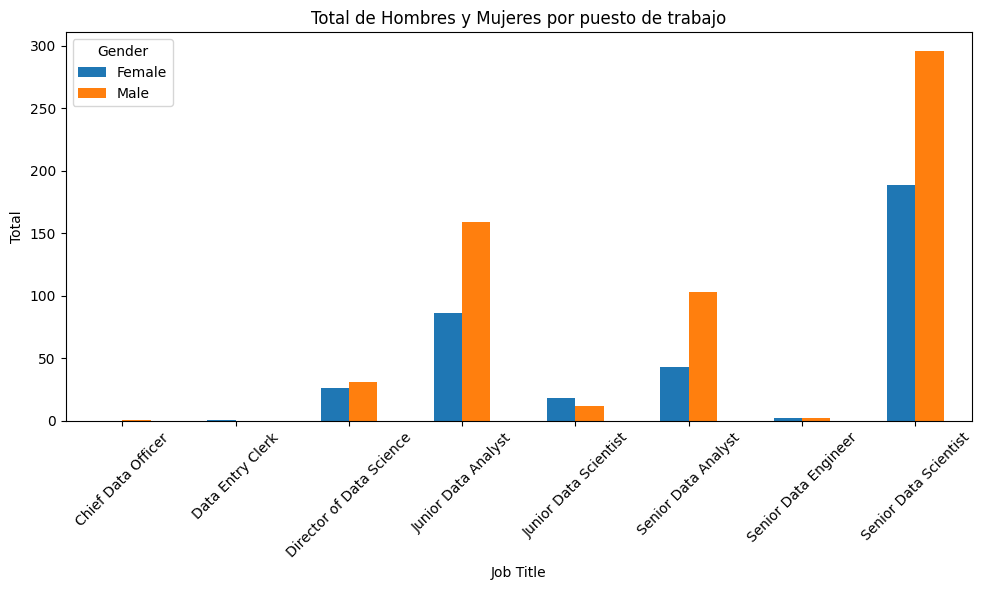

In [135]:
df4_unstacked.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Job Title')
plt.ylabel('Total')
plt.title('Total de Hombres y Mujeres por puesto de trabajo')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

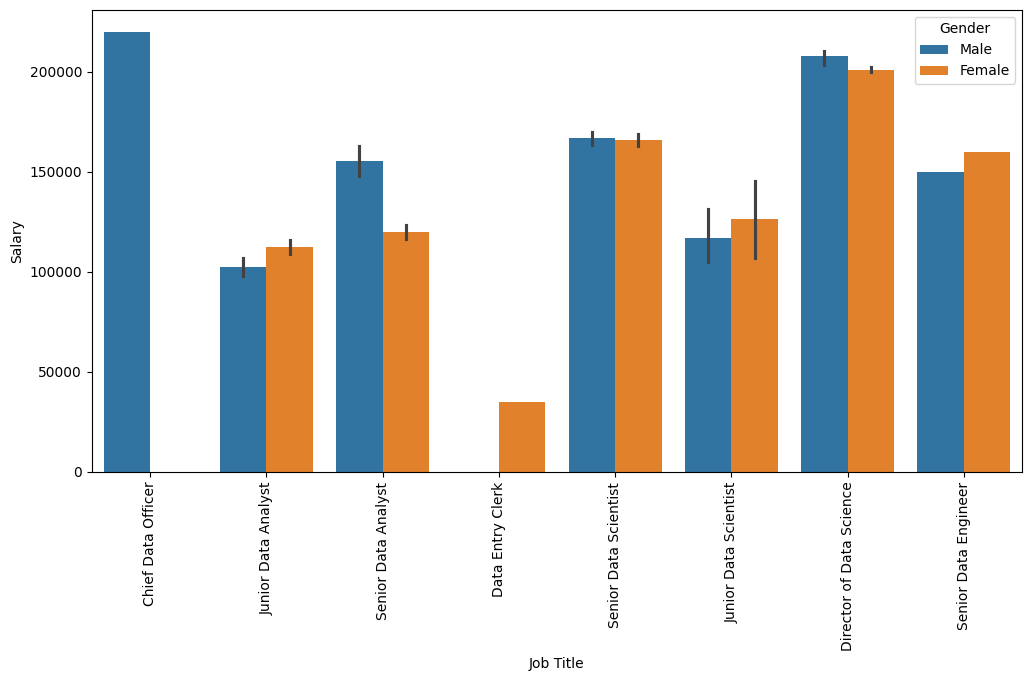

In [118]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Job Title', y='Salary', hue='Gender',data=df_data)
plt.xticks(rotation=90)
plt.show()

C:\Users\laura\AppData\Local\Temp\ipykernel_6940\281820600.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x = 'Years of Experience', y='Salary', hue='Gender',data=df_data, palette=sns.color_palette('Set2'))


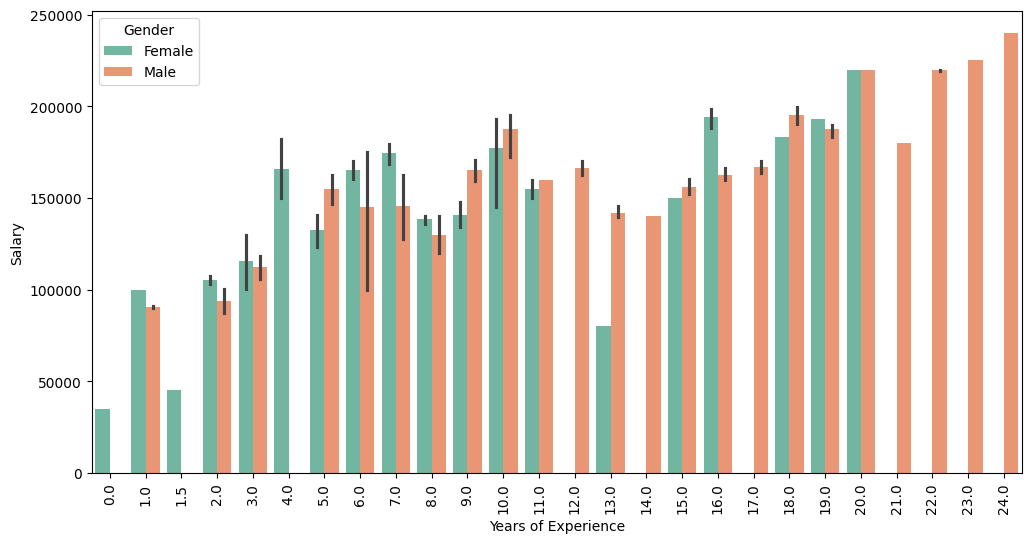

In [146]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Years of Experience', y='Salary', hue='Gender',data=df_data, palette=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.show()

## HIPOTESIS 2: ##
Relacion entre años de experiencia y salario.
Hipotesis nula, a mayor tiempo trabajado, mayor salario.

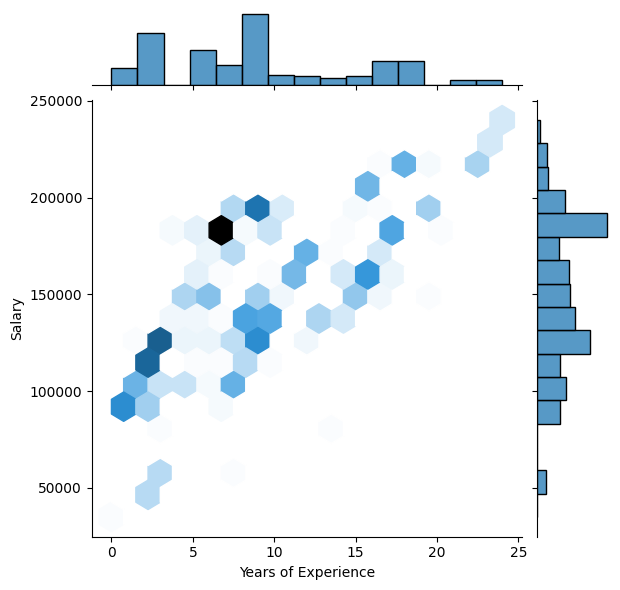

In [149]:
sns.jointplot(data = df_data, x = 'Years of Experience', y='Salary',  kind = 'hex' );

C:\Users\laura\AppData\Local\Temp\ipykernel_6940\929589858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Years of Experience', y='Salary',data=df_data, palette=sns.color_palette('Set2'))
C:\Users\laura\AppData\Local\Temp\ipykernel_6940\929589858.py:2: UserWarning: 
The palette list has fewer values (8) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'Years of Experience', y='Salary',data=df_data, palette=sns.color_palette('Set2'))


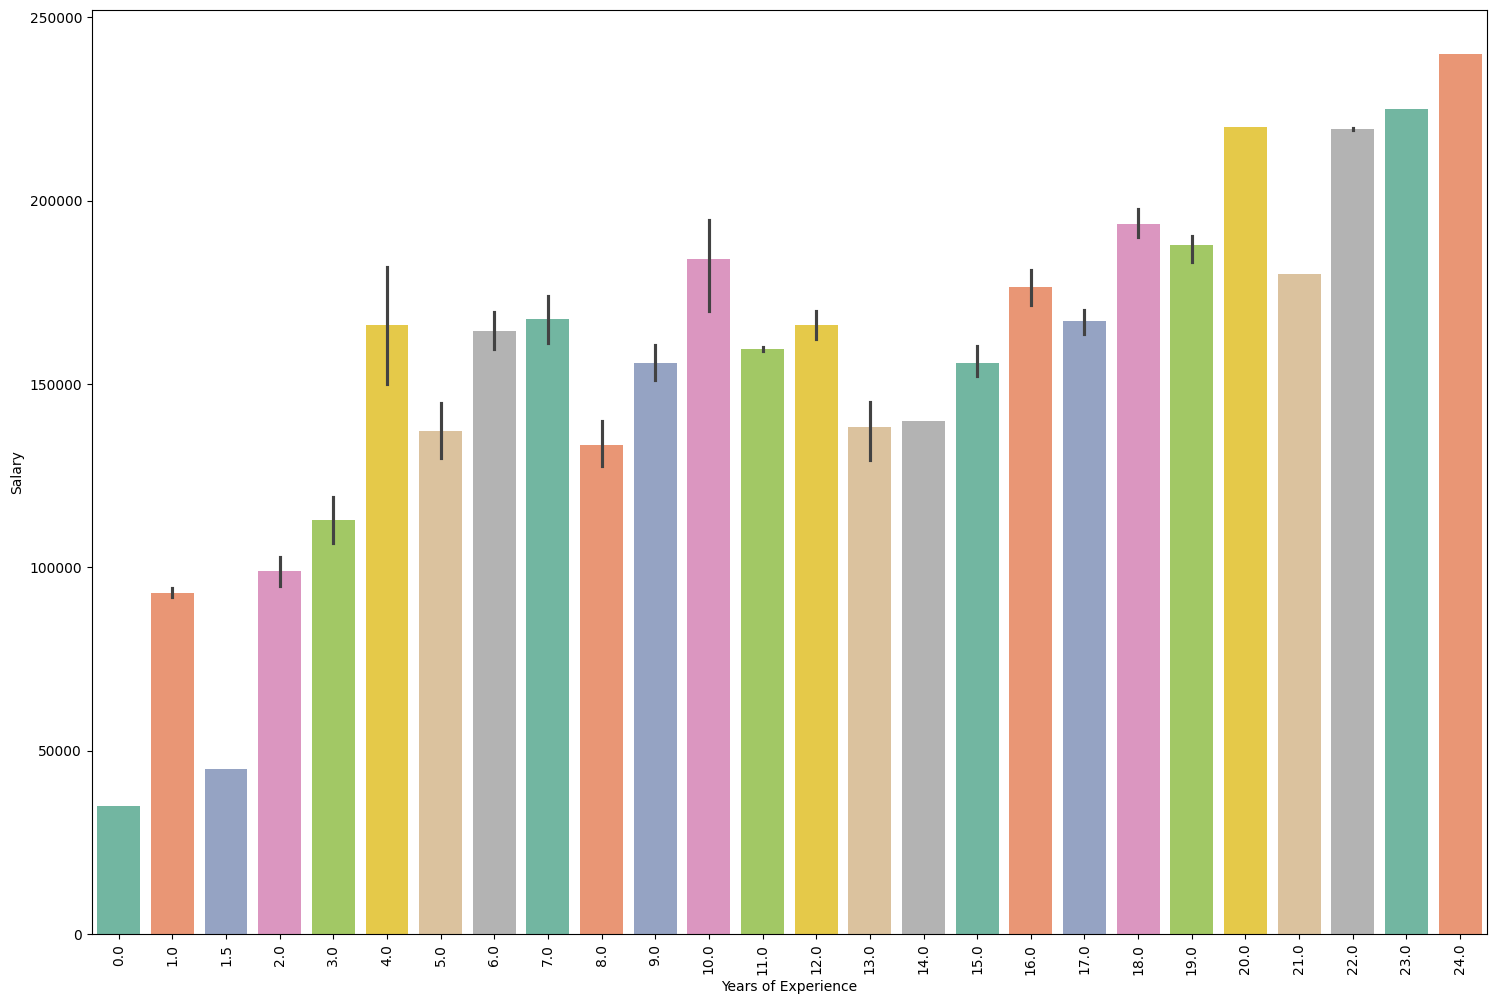

In [138]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Years of Experience', y='Salary',data=df_data, palette=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.show()

## HIPOTESIS 3: ##
Relacion entre nivel educativo, salario y sexo.
Hipotesis nula, no hay diferencia entre sexos para el salario en los puestos relacionados con DATA.

C:\Users\laura\AppData\Local\Temp\ipykernel_6940\4125025634.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x = 'Education Level', y='Salary', hue='Gender',data=df_data, palette=sns.color_palette('Set2'))


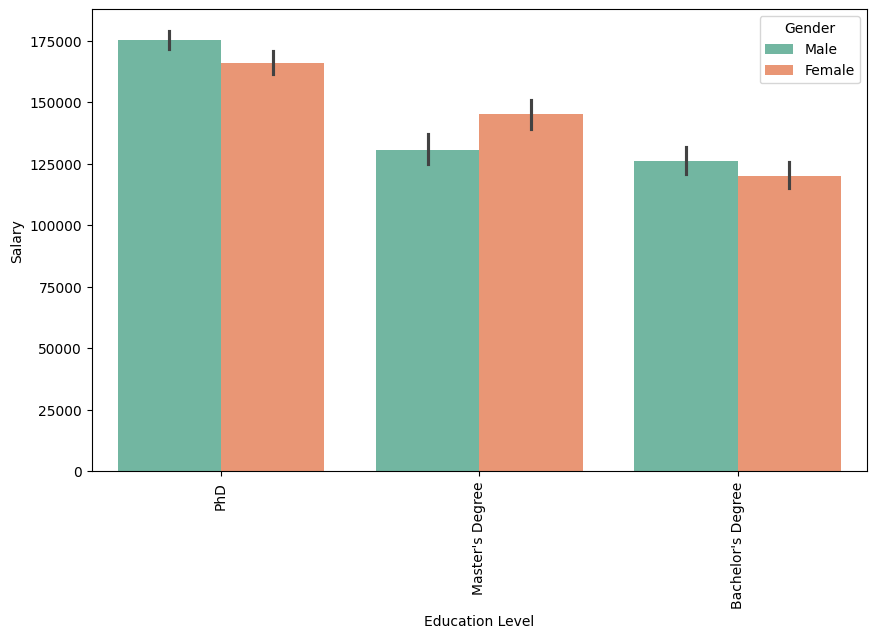

In [145]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Education Level', y='Salary', hue='Gender',data=df_data, palette=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.show()